In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/exercise.csv")

# First know our data

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [7]:
df.shape

(15000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [10]:
df.duplicated().sum()

0

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
df.drop(['User_ID'],axis = 1, inplace=True)

In [13]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


Gender
female    7553
male      7447
Name: count, dtype: int64


<Axes: ylabel='count'>

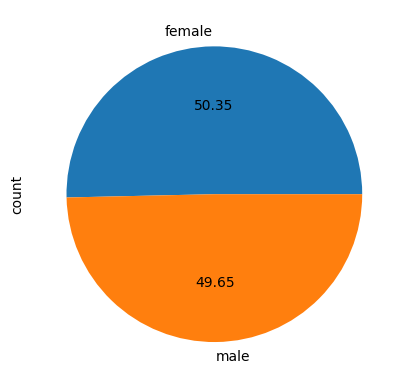

In [14]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

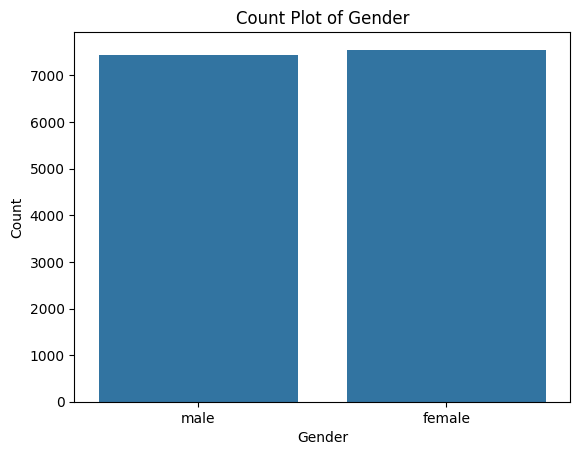

In [15]:
sns.countplot(x='Gender', data=df)
plt.title("Count Plot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [16]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'male' else 1)

In [17]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190,94,29,105,40.8,231
1,1,20,166,60,14,94,40.3,66
2,0,69,179,79,5,88,38.7,26
3,1,34,179,71,13,100,40.5,71
4,1,27,154,58,10,81,39.8,35


<Axes: >

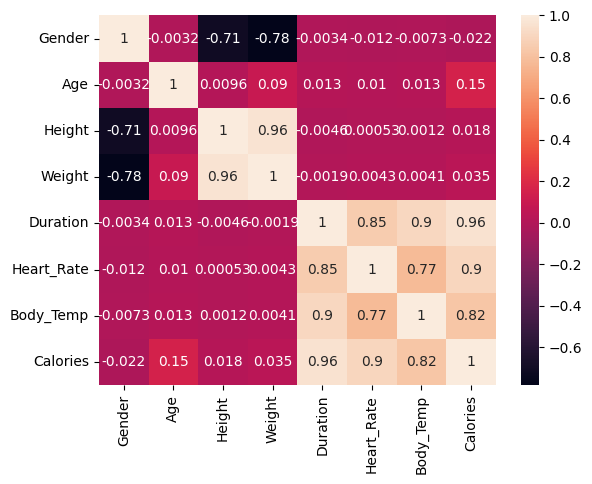

In [18]:
sns.heatmap(df.corr(),annot=True)

Agehistogram 

Heighthistogram 

Weighthistogram 

Durationhistogram 

Heart_Ratehistogram 

Body_Temphistogram 

Calorieshistogram 



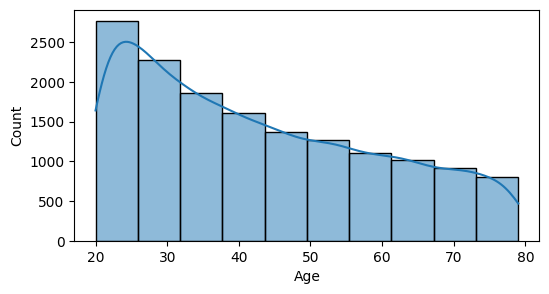

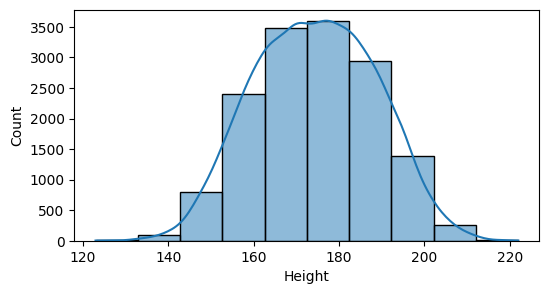

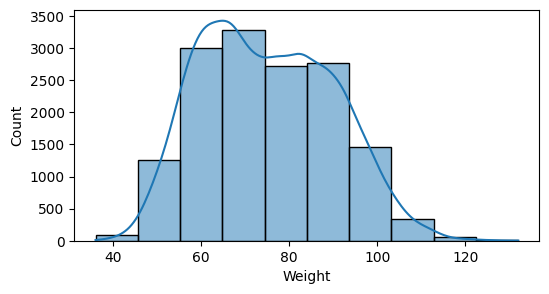

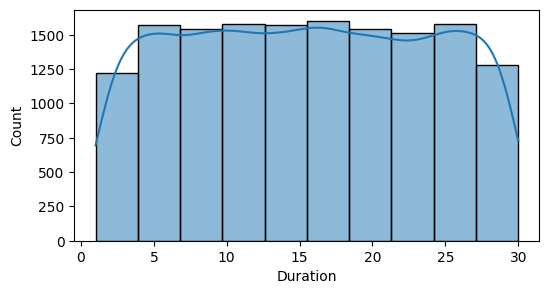

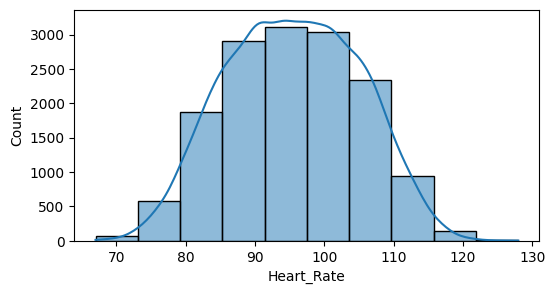

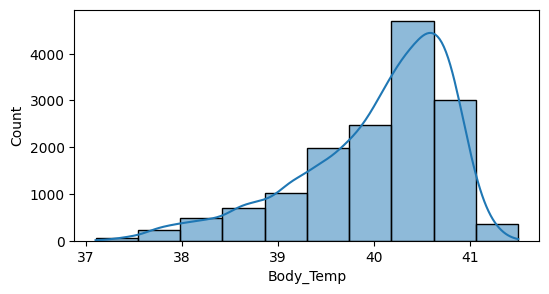

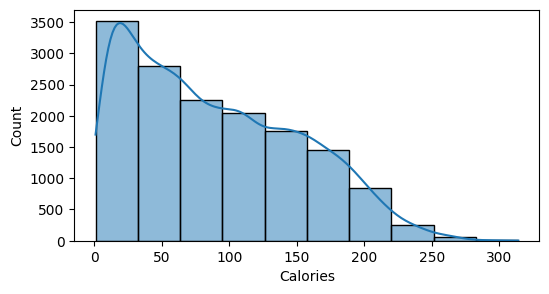

In [19]:
df_new = df.iloc[:,[1,2,3,4,5,6,7]]
for col in df_new.columns:
  plt.figure(figsize = (6,3))
  print(col + 'histogram \n')
  sns.histplot(x=col , data = df_new , bins= 10,kde=True)


Agehistogram 

Heighthistogram 

Weighthistogram 

Durationhistogram 

Heart_Ratehistogram 

Body_Temphistogram 

Calorieshistogram 



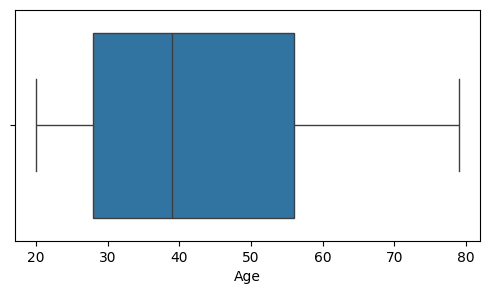

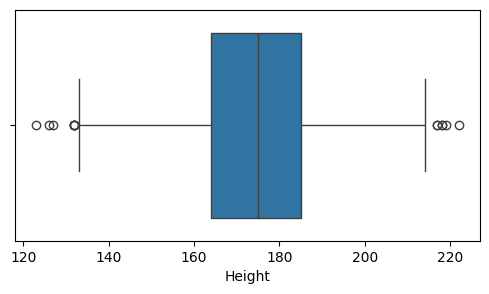

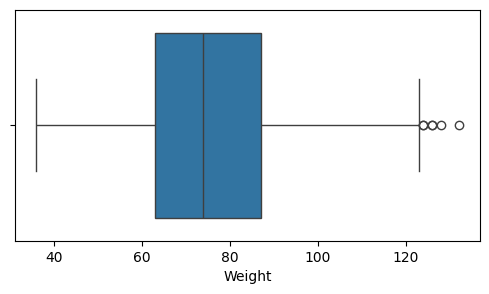

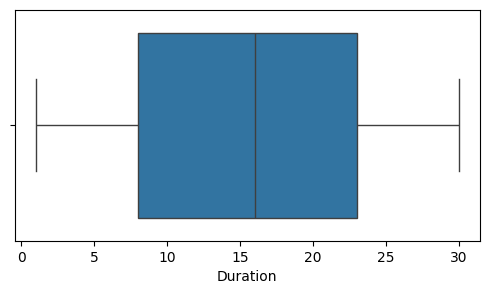

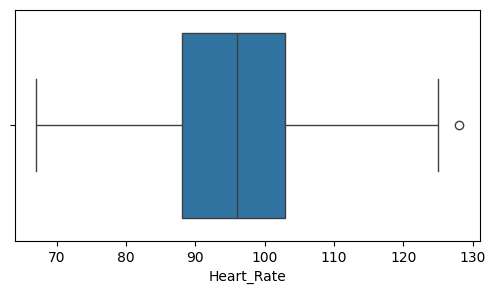

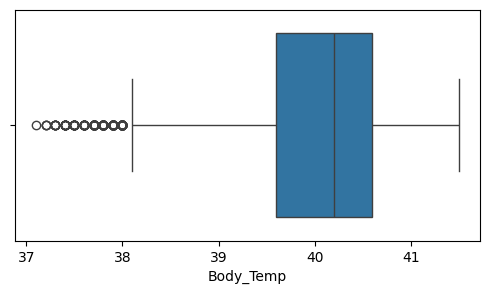

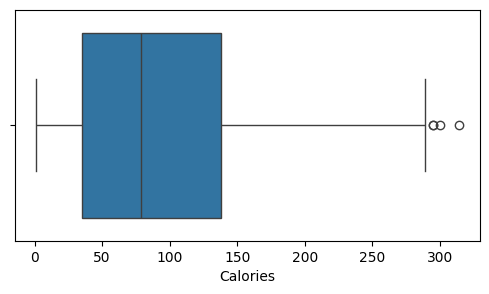

In [20]:
for col in df_new.columns:
  plt.figure(figsize = (6,3))
  print(col + 'histogram \n')
  sns.boxplot(x=col , data = df_new)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
529,1,35,132,38,30,112,40.5,216
1054,1,31,133,45,3,84,38.0,12
1464,0,51,217,118,4,85,39.1,19
4200,1,63,123,40,9,97,39.9,55
4404,1,20,132,41,5,85,39.3,20
4855,1,59,132,40,10,92,39.9,55
6226,1,58,127,40,29,102,40.8,189
6711,0,40,218,132,1,88,37.8,5
7774,1,30,126,39,25,104,40.7,156
8130,1,27,133,38,4,86,39.1,17


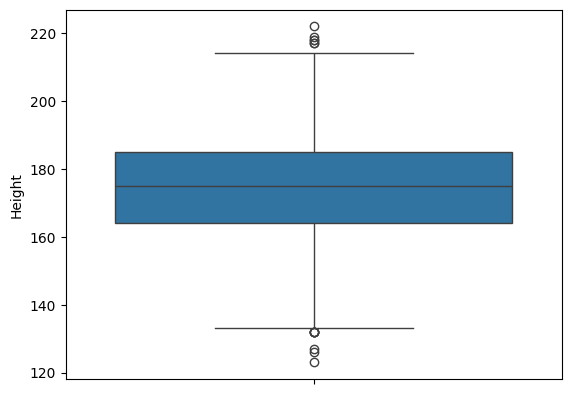

In [21]:
# Outlier for Height Column
sns.boxplot(df['Height'])
df[(df['Height'] > 215) | (df['Height'] < 135)]

In [22]:
df['Weight'].describe()

,Weight
count,15000.000000
mean,74.966867
std,15.035657
min,36.000000
25%,63.000000
50%,74.000000
75%,87.000000
max,132.000000


In [23]:
print(87 - 63)

24


In [24]:
87 + 24*1.5

123.0

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1909,0,67,212,124,16,87,40.1,94
6711,0,40,218,132,1,88,37.8,5
10362,0,22,222,128,6,84,39.3,20
12189,0,21,219,126,15,97,40.4,78
13276,0,55,217,126,17,91,40.4,101
13806,0,43,214,124,17,103,40.7,121


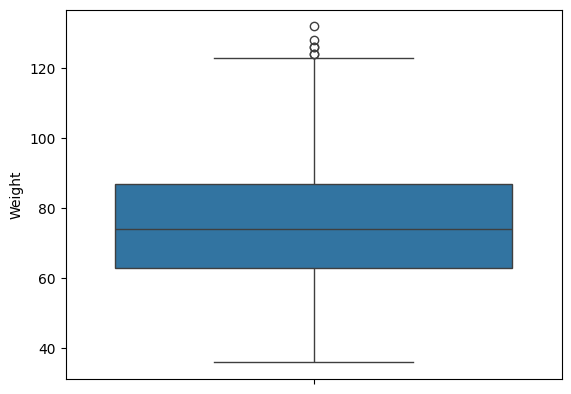

In [25]:
sns.boxplot(df['Weight'])
df[df['Weight'] > 123]


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9981,0,32,188,91,30,128,40.9,289


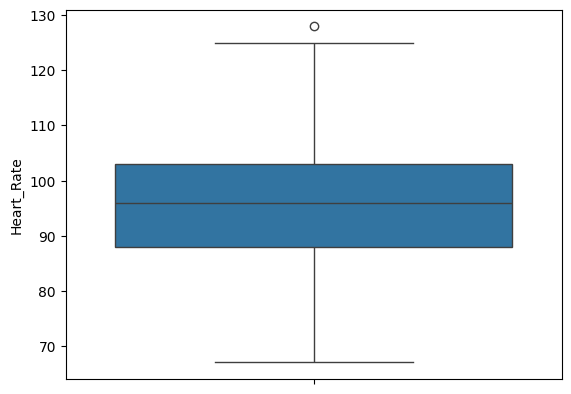

In [26]:
sns.boxplot(df['Heart_Rate'])
df[df['Heart_Rate'] > 125]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190,94,29,105,40.8,231
1,1,20,166,60,14,94,40.3,66
2,0,69,179,79,5,88,38.7,26
3,1,34,179,71,13,100,40.5,71
4,1,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193,86,11,92,40.4,45
14996,1,27,165,65,6,85,39.2,23
14997,1,43,159,58,16,90,40.1,75
14998,0,78,193,97,2,84,38.3,11


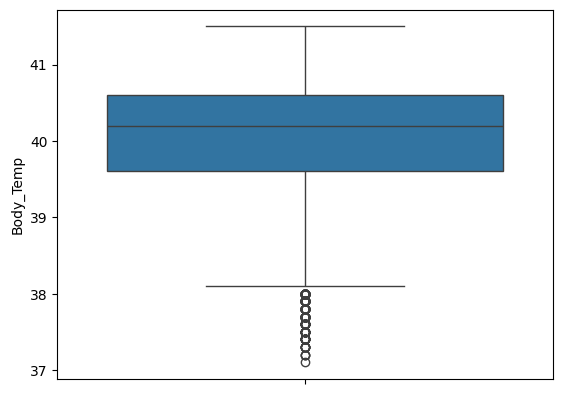

In [27]:
sns.boxplot(df['Body_Temp'])
df[df['Heart_Rate'] > 38]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
428,0,75,199,103,28,123,40.5,314
3357,0,65,189,98,27,125,40.9,295
6240,0,69,193,90,29,121,41.1,300
13871,0,75,178,76,29,120,40.8,295


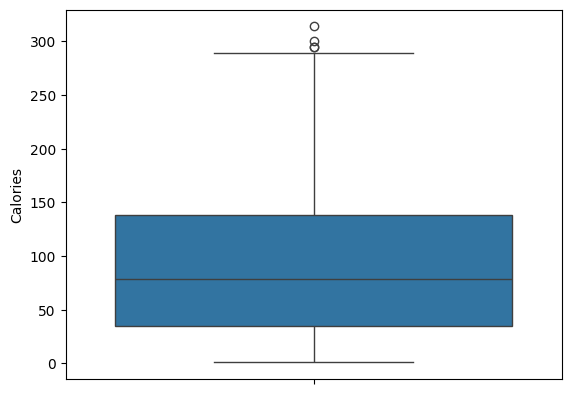

In [28]:
sns.boxplot(df['Calories'])
df[df['Calories'] >= 295]

In [30]:
# sns.scatterplot(data=df,x=df['Weight'],y=df['Calories'] ,hue=df['Gender'])